In [1]:
import pandas as pd

In [2]:
array1 = pd.read_excel("../../CountyFair.xlsx")

In [3]:
array1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 97 entries, 0 to 96
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Physical Postcards  97 non-null     object
 1   Unnamed: 1          96 non-null     object
 2   Unnamed: 2          7 non-null      object
 3   Unnamed: 3          58 non-null     object
 4   Unnamed: 4          2 non-null      object
dtypes: object(5)
memory usage: 3.9+ KB


In [4]:
ds = array1.rename(columns={ "Unnamed: 1": "Year2050", "Unnamed: 2": "Translation1", "Unnamed: 3": "Getting_Here","Unnamed: 4": "Translation2"})

In [5]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 97 entries, 0 to 96
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Physical Postcards  97 non-null     object
 1   Year2050            96 non-null     object
 2   Translation1        7 non-null      object
 3   Getting_Here        58 non-null     object
 4   Translation2        2 non-null      object
dtypes: object(5)
memory usage: 3.9+ KB


In [7]:
import spacy
from spacytextblob.spacytextblob import SpacyTextBlob

In [48]:
nlp = spacy.load('en_core_web_sm')
nlp.add_pipe('spacytextblob')

string_list = ds['Year2050'].tolist()
pol_list = []
sub_list = []
t = 0
for t in range(2,len(string_list)):
    text = string_list[t]
    doc = nlp(text)
    pol_list.append(doc._.blob.polarity)
    sub_list.append(doc._.blob.subjectivity)

In [49]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

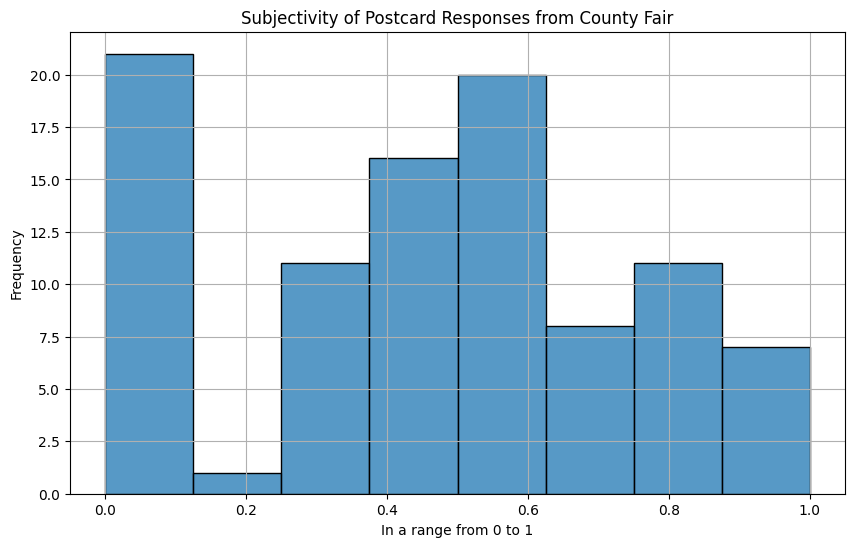

In [61]:
plt.figure(figsize=(10, 6))
sns.histplot(data=sub_list)
plt.title('Subjectivity of Postcard Responses from County Fair')
plt.xlabel('In a range from 0 to 1')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

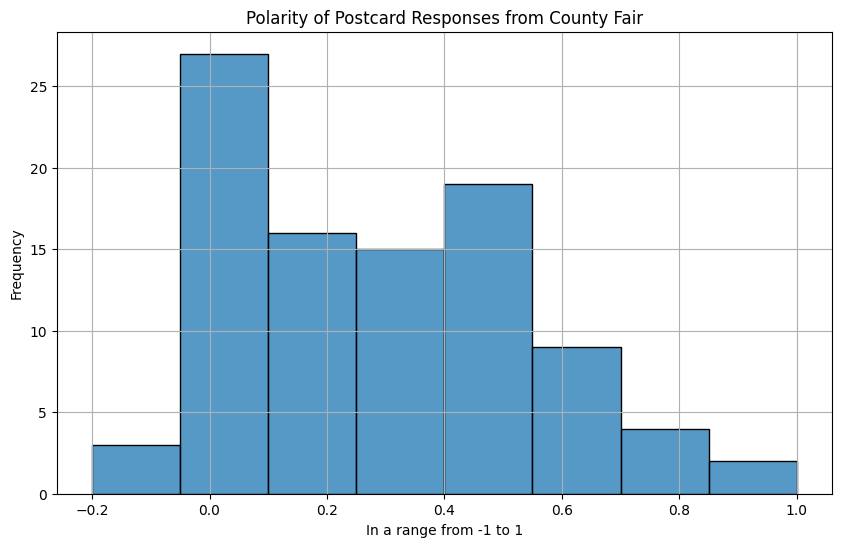

In [60]:
plt.figure(figsize=(10, 6))
sns.histplot(data=pol_list)
plt.title('Polarity of Postcard Responses from County Fair')
plt.xlabel('In a range from -1 to 1')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()